In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd

In [2]:
# Specify the filename for the .pkl file
filename = "drybean_stats.pkl"
# Load the dictionary back from the .pkl file
with open(filename, "rb") as f:
    stats = pickle.load(f)

In [3]:
iterations = list(stats.keys())
all_methods = list(stats[0].keys())
percentages = list(stats[0]['FES'].keys())
metrics = list(stats[0]['FES'][1.0].keys())

In [4]:
median_stats = {}
for method_key in all_methods:
    median_stats[method_key] = {}
    for percentage_key in percentages:
        median_stats[method_key][percentage_key] = {}
        for metric_key in metrics:
            median_stats[method_key][percentage_key][metric_key] = np.median([stats[iter][method_key][percentage_key][metric_key] for iter in iterations])

## How does the reduction affects the efficiency?

In [5]:
time_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        time_df.loc[m][p] = round(median_stats[m][p]['time'],2)
time_df_t = time_df.transpose()
time_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,20.04,32.2,20.21,20.12,20.59,18.68,28.7,89.11
0.2,39.79,63.17,40.08,39.99,40.61,37.83,48.66,102.66
0.3,59.68,93.95,59.75,60.03,60.73,59.92,68.57,116.22
0.4,79.61,123.54,79.58,79.68,80.78,79.66,88.4,129.85
0.5,99.43,155.65,99.85,99.53,100.7,99.52,108.22,143.55
0.6,119.51,186.72,119.07,119.42,120.85,119.79,127.85,156.39
0.7,139.62,216.93,139.02,139.25,140.27,139.51,148.02,170.35
0.8,159.27,251.16,158.59,159.39,160.42,159.05,168.07,184.37
0.9,179.19,286.36,178.53,178.83,179.95,179.44,188.09,197.12
1.0,198.8,198.8,198.8,198.8,198.8,198.8,198.8,198.8


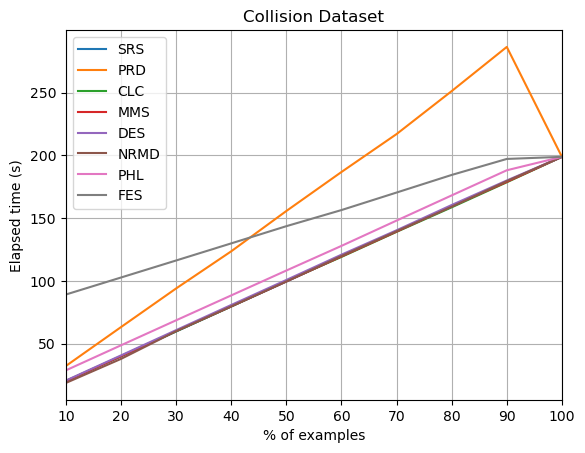

In [6]:
for idx, row in time_df.iterrows():
    plt.plot(time_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Elapsed time (s)')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.grid()
plt.legend()
plt.show()

In [7]:
carbon_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        carbon_df.loc[m][p] = round(median_stats[m][p]['carbon'] * 1000,3)
carbon_df_t = carbon_df.transpose()
carbon_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,0.071,0.114,0.072,0.071,0.073,0.066,0.102,0.316
0.2,0.141,0.224,0.142,0.142,0.144,0.134,0.173,0.364
0.3,0.212,0.334,0.212,0.213,0.216,0.213,0.243,0.413
0.4,0.283,0.439,0.283,0.283,0.287,0.283,0.314,0.461
0.5,0.353,0.553,0.354,0.353,0.358,0.353,0.384,0.51
0.6,0.424,0.663,0.423,0.424,0.429,0.425,0.454,0.555
0.7,0.496,0.77,0.494,0.494,0.498,0.495,0.526,0.605
0.8,0.565,0.892,0.563,0.566,0.57,0.565,0.597,0.655
0.9,0.636,1.017,0.634,0.635,0.639,0.637,0.668,0.7
1.0,0.706,0.706,0.706,0.706,0.706,0.706,0.706,0.706


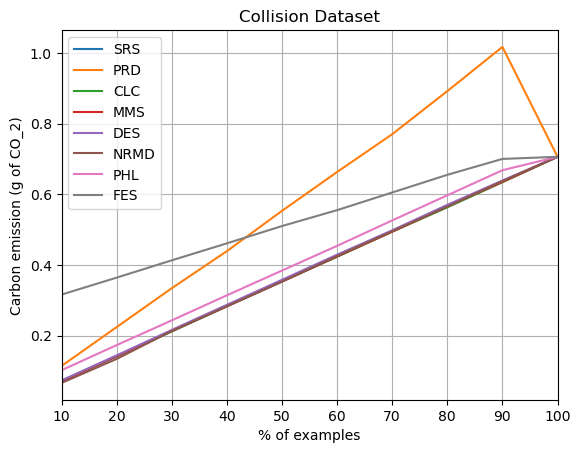

In [8]:
for idx, row in carbon_df.iterrows():
    plt.plot(carbon_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Carbon emission (g of CO_2)')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.grid()
plt.legend()
plt.show()

## How $\varepsilon$-representative are the reduced datasets?

In [9]:
epsilon_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        epsilon_df.loc[m][p] = round(median_stats[m][p]['epsilon'],3)
epsilon_df_t = epsilon_df.transpose()
epsilon_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,0.902,0.868,0.273,0.148,0.582,0.926,0.895,0.792
0.2,0.897,0.868,0.218,0.112,0.359,0.926,0.776,0.635
0.3,0.868,0.868,0.21,0.095,0.271,0.926,0.413,0.635
0.4,0.776,0.868,0.168,0.089,0.244,0.926,0.288,0.393
0.5,0.33,0.868,0.168,0.074,0.238,0.901,0.231,0.351
0.6,0.33,0.868,0.132,0.066,0.238,0.901,0.217,0.218
0.7,0.33,0.868,0.13,0.059,0.185,0.901,0.227,0.218
0.8,0.226,0.868,0.116,0.053,0.161,0.901,0.172,0.178
0.9,0.226,0.868,0.108,0.045,0.116,0.862,0.21,0.165
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


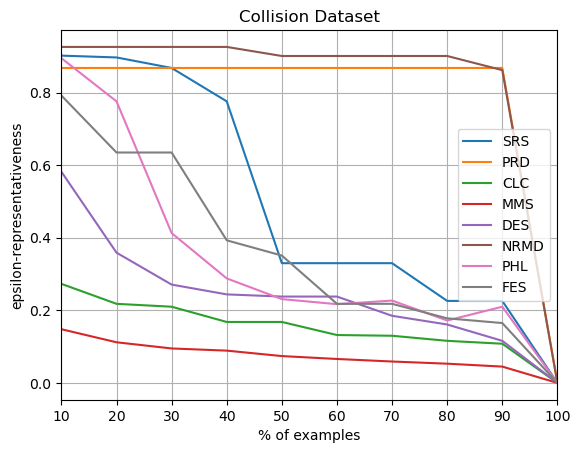

In [10]:
for idx, row in epsilon_df.iterrows():
    plt.plot(epsilon_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('epsilon-representativeness')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.grid()
plt.legend()
plt.show()

## How does the reduction affect the performance?

In [11]:
accuracy_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        accuracy_df.loc[m][p] = round(median_stats[m][p]['acc'],3)
accuracy_df_t = accuracy_df.transpose()
accuracy_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,0.794,0.717,0.775,0.685,0.641,0.525,0.758,0.665
0.2,0.797,0.732,0.812,0.731,0.719,0.644,0.796,0.763
0.3,0.833,0.8,0.845,0.761,0.717,0.649,0.841,0.83
0.4,0.84,0.829,0.848,0.827,0.749,0.723,0.871,0.865
0.5,0.875,0.84,0.845,0.867,0.843,0.784,0.87,0.889
0.6,0.875,0.871,0.875,0.856,0.717,0.809,0.882,0.889
0.7,0.89,0.881,0.89,0.89,0.86,0.818,0.863,0.888
0.8,0.895,0.888,0.885,0.874,0.864,0.843,0.896,0.887
0.9,0.88,0.898,0.891,0.882,0.865,0.859,0.888,0.888
1.0,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899


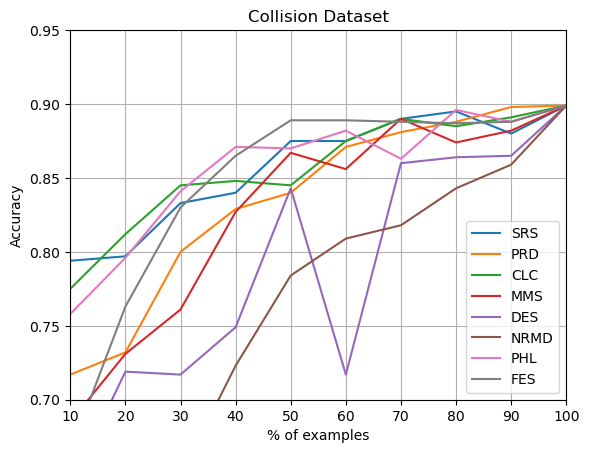

In [12]:
for idx, row in accuracy_df.iterrows():
    plt.plot(accuracy_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Accuracy')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.70,0.95)
plt.grid()
plt.legend()
plt.show()

In [15]:
precision_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        precision_df.loc[m][p] = round(median_stats[m][p]['pre_avg'],3)
precision_df_t = precision_df.transpose()
precision_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,0.785,0.768,0.785,0.725,0.745,0.617,0.747,0.713
0.2,0.819,0.793,0.822,0.801,0.767,0.712,0.809,0.81
0.3,0.868,0.857,0.863,0.828,0.803,0.706,0.876,0.879
0.4,0.863,0.85,0.872,0.857,0.848,0.772,0.884,0.903
0.5,0.902,0.893,0.878,0.896,0.889,0.801,0.896,0.91
0.6,0.911,0.893,0.905,0.887,0.802,0.818,0.91,0.914
0.7,0.907,0.905,0.913,0.915,0.894,0.846,0.896,0.91
0.8,0.918,0.907,0.911,0.902,0.909,0.862,0.92,0.914
0.9,0.903,0.915,0.913,0.908,0.906,0.884,0.907,0.911
1.0,0.917,0.917,0.917,0.917,0.917,0.917,0.917,0.917


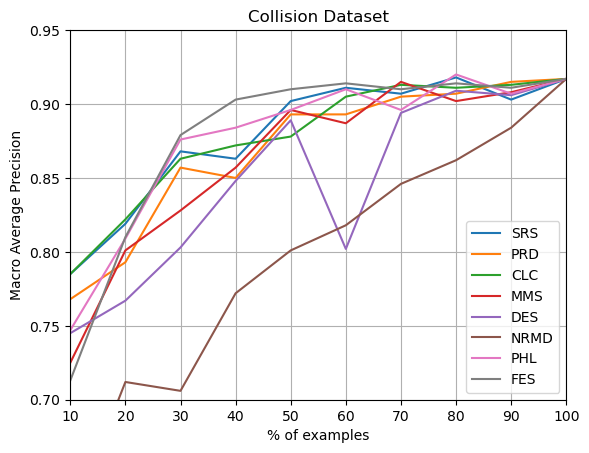

In [16]:
for idx, row in precision_df.iterrows():
    plt.plot(precision_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Macro Average Precision')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.70,0.95)
plt.grid()
plt.legend()
plt.show()

In [19]:
recall_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        recall_df.loc[m][p] = round(median_stats[m][p]['rec_avg'],3)
recall_df_t = recall_df.transpose()
recall_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,0.776,0.731,0.77,0.692,0.718,0.413,0.765,0.696
0.2,0.776,0.729,0.804,0.738,0.753,0.517,0.781,0.759
0.3,0.816,0.803,0.838,0.766,0.779,0.52,0.834,0.84
0.4,0.836,0.841,0.844,0.819,0.799,0.592,0.888,0.881
0.5,0.877,0.857,0.864,0.874,0.877,0.65,0.878,0.895
0.6,0.892,0.88,0.878,0.868,0.792,0.757,0.9,0.901
0.7,0.904,0.888,0.907,0.89,0.885,0.779,0.885,0.905
0.8,0.903,0.902,0.893,0.886,0.888,0.819,0.907,0.905
0.9,0.885,0.912,0.898,0.887,0.883,0.864,0.896,0.903
1.0,0.911,0.911,0.911,0.911,0.911,0.911,0.911,0.911


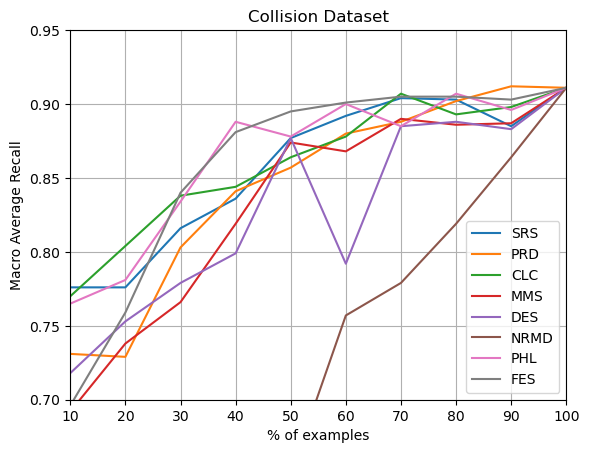

In [20]:
for idx, row in recall_df.iterrows():
    plt.plot(recall_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Macro Average Recall')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.70,0.95)
plt.grid()
plt.legend()
plt.show()

In [23]:
f1score_df = pd.DataFrame(index=all_methods, columns=percentages)
for m in all_methods:
    for p in percentages:
        f1score_df.loc[m][p] = round(median_stats[m][p]['f1_avg'],3)
f1score_df_t = f1score_df.transpose()
f1score_df_t

,SRS,PRD,CLC,MMS,DES,NRMD,PHL,FES
0.1,0.747,0.727,0.807,0.771,0.763,0.628,0.724,0.643
0.2,0.764,0.721,0.796,0.747,0.739,0.759,0.803,0.737
0.3,0.838,0.797,0.843,0.78,0.782,0.758,0.834,0.844
0.4,0.879,0.84,0.844,0.812,0.847,0.773,0.883,0.891
0.5,0.88,0.862,0.862,0.877,0.879,0.822,0.883,0.9
0.6,0.896,0.882,0.883,0.866,0.773,0.83,0.901,0.904
0.7,0.902,0.892,0.907,0.899,0.885,0.864,0.882,0.908
0.8,0.909,0.903,0.896,0.887,0.891,0.879,0.912,0.908
0.9,0.889,0.914,0.904,0.891,0.888,0.892,0.9,0.904
1.0,0.913,0.913,0.913,0.913,0.913,0.913,0.913,0.913


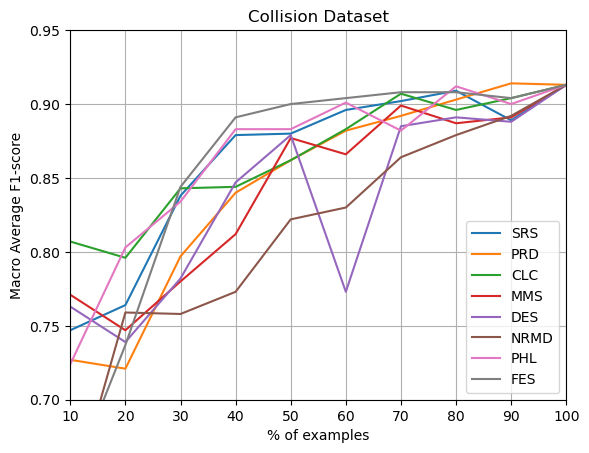

In [24]:
for idx, row in f1score_df.iterrows():
    plt.plot(f1score_df.columns * 100, row, label=idx)
plt.xlabel('% of examples')
plt.ylabel('Macro Average F1-score')
plt.title('Collision Dataset')
plt.xlim(10,100)
plt.ylim(0.70,0.95)
plt.grid()
plt.legend()
plt.show()

## Does the $\varepsilon$-representativeness affect the performance?

In [25]:
epsilon_acc_df = pd.DataFrame(index=['rho', 'p-value'], columns=percentages[:-1])
for p in percentages[:-1]:
    epsilon_values = []
    accuracy_values = []
    for iter in iterations:
        for m in all_methods:
            epsilon_values.append(stats[iter][m][p]['epsilon'])
            accuracy_values.append(stats[iter][m][p]['acc'])
    rho, pvalue = spearmanr(epsilon_values, accuracy_values)
    epsilon_acc_df.loc['rho'][p], epsilon_acc_df.loc['p-value'][p] = round(rho,2), round(pvalue,2)
epsilon_acc_df_dt = epsilon_acc_df.transpose()
epsilon_acc_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
rho,-0.16,-0.18,-0.13,-0.25,-0.13,-0.26,-0.25,-0.05,0.05
p-value,0.15,0.11,0.24,0.03,0.24,0.02,0.03,0.68,0.67


In [26]:
epsilon_f1_df = pd.DataFrame(index=['rho', 'p-value'], columns=percentages[:-1])
for p in percentages[:-1]:
    epsilon_values = []
    f1_values = []
    for iter in iterations:
        for m in all_methods:
            epsilon_values.append(stats[iter][m][p]['epsilon'])
            f1_values.append(stats[iter][m][p]['f1_avg'])
    rho, pvalue = spearmanr(epsilon_values, f1_values)
    epsilon_f1_df.loc['rho'][p], epsilon_f1_df.loc['p-value'][p] = round(rho,2), round(pvalue,2)
epsilon_f1_df_dt = epsilon_f1_df.transpose()
epsilon_f1_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
rho,-0.35,-0.15,-0.09,-0.14,-0.1,-0.2,-0.24,-0.06,0.02
p-value,0.0,0.19,0.42,0.22,0.36,0.08,0.03,0.59,0.84
